In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
import sys
import warnings
from scipy.stats import entropy
warnings.filterwarnings("ignore")
from scipy.stats import ttest_rel 
from pure_eval_supp import *

In [2]:
###
methods = ['stereoscope', 'spatialDWLS', 'RCTD', 'cell2loc', 'music', 'spotlight', 'BayesSpace']
cell_types = ['Cancer', 'Ductal', 'Stroma']
#tru_fn = '/mnt/humble_50t/alexw/ReSort_manuscript/simulation/simulated_data/primary/pure/simulated_spot_counts_ground_truth.csv'
# folder = '/houston_20t/alexw/ST/iSort/simulation_010222/s1/pure/'
# truth = pd.read_csv(f"/houston_20t/alexw/ST/iSort/simulation_010222/s1/pure/simulated_spot_counts_ground_truth.csv", index_col=0)
folder = '../../models_results/primary/'
tru_fn = '../../simulated_data/pure/simulated_spot_counts_ground_truth_primary.csv'
truth = pd.read_csv(tru_fn, index_col=0)
truth = truth[cell_types]
truth = truth.divide(truth.sum(axis=1), axis=0)
cell_types = ['Cancer', 'Ductal', 'Stroma']

In [3]:
methods = ['stereoscope', 'spatialDWLS', 'RCTD', 'cell2loc', 'music', 'spotlight', 'BayesSpace']
#res_folder = '/mnt/humble_50t/alexw/ReSort_manuscript/simulation/models_results/primary/pure/'
res_folder = '../../models_results/primary/pure/'
r_dfs, kl_dfs = [], []

for method in methods:
    r_df, kl_df = get_results(method, cell_types=cell_types, truth=truth, folder=res_folder)
    r_dfs.append(r_df)
    kl_dfs.append(kl_df)
r_dfs = pd.concat(r_dfs)
kl_dfs = pd.concat(kl_dfs)

In [4]:
# r_dfs.to_csv("Pure_pearsonr_spots.csv")
# kl_dfs.to_csv("Pure_kldivergene_spots.csv")

In [5]:
internal_r = r_dfs.loc[r_dfs.reference == 'Internal']
external_r = r_dfs.loc[r_dfs.reference == 'External']
mist_r = r_dfs.loc[r_dfs.reference == 'ReSort']
internal_r.index = [f"{internal_r.index.tolist()[i]}_{internal_r.method.tolist()[i]}" for i in range(internal_r.shape[0])]
external_r.index = [f"{external_r.index.tolist()[i]}_{external_r.method.tolist()[i]}" for i in range(external_r.shape[0])]
mist_r.index = [f"{mist_r.index.tolist()[i]}_{mist_r.method.tolist()[i]}" for i in range(mist_r.shape[0])]
external_r = external_r.loc[internal_r.index]
mist_r = mist_r.loc[internal_r.index]

In [6]:
print(ttest_rel(internal_r.r.to_numpy(), mist_r.r.to_numpy(), nan_policy='omit'),
       np.nanmean(internal_r.r.to_numpy() - mist_r.r.to_numpy()),
      np.nanmean(np.absolute(internal_r.r.to_numpy() - mist_r.r.to_numpy())) / np.nanmean(internal_r.r.to_numpy()))

print(ttest_rel(external_r.r.to_numpy(), mist_r.r.to_numpy(), nan_policy='omit'),
      np.nanmean(external_r.r.to_numpy() - mist_r.r.to_numpy()),
      np.nanmean(np.absolute((external_r.r.to_numpy() - mist_r.r.to_numpy())) / np.nanmean(external_r.r.to_numpy())))

Ttest_relResult(statistic=-4.9788305818485945, pvalue=6.468662232691475e-07) -0.004139207426330733 0.02995465478329942
Ttest_relResult(statistic=-41.04712667515803, pvalue=0.0) -0.11207312531209533 0.2101047546259661


In [7]:
bs_r = r_dfs.loc[r_dfs.reference == 'BayesSpace']
mist_r_spots_idx = r_dfs.loc[r_dfs.reference == 'ReSort']
grps = mist_r_spots_idx.groupby('method')

for name, grp in grps:
    grp = grp.loc[bs_r.index,:]
    print(name, ttest_rel(bs_r.r.to_numpy(), grp.r.to_numpy(), nan_policy='omit'),
       np.nanmean(bs_r.r.to_numpy() - grp.r.to_numpy()),
      np.nanmean(np.absolute(bs_r.r.to_numpy() - grp.r.to_numpy())) / np.nanmean(grp.r.to_numpy()))

RCTD Ttest_relResult(statistic=-7.691555847787977, pvalue=2.0828404669714552e-14) -0.06035343141142955 0.18782362766277633
cell2loc Ttest_relResult(statistic=-12.639501522220446, pvalue=1.5629189518574195e-35) -0.08738887403802668 0.1562677019344126
music Ttest_relResult(statistic=-9.765998001714621, pvalue=3.932532323984822e-22) -0.06664453978525188 0.16248441795708565
spatialDWLS Ttest_relResult(statistic=-10.937749046113042, pvalue=3.1602775032434664e-27) -0.07567106877302943 0.15728759961967123
spotlight Ttest_relResult(statistic=-13.558443075838976, pvalue=1.8939539250706026e-40) -0.08555691342651094 0.13915940609071645
stereoscope Ttest_relResult(statistic=-8.696949211820064, pvalue=6.0971310229890215e-18) -0.06783693083883799 0.18292333222137233


In [8]:
internal_kl = kl_dfs.loc[kl_dfs.reference == 'Internal']
external_kl = kl_dfs.loc[kl_dfs.reference == 'External']
mist_kl = kl_dfs.loc[kl_dfs.reference == 'ReSort']

internal_kl.index = [f"{internal_kl.index.tolist()[i]}_{internal_kl.method.tolist()[i]}" for i in range(internal_kl.shape[0])]
external_kl.index = [f"{external_kl.index.tolist()[i]}_{external_kl.method.tolist()[i]}" for i in range(external_kl.shape[0])]
mist_kl.index = [f"{mist_kl.index.tolist()[i]}_{mist_kl.method.tolist()[i]}" for i in range(mist_kl.shape[0])]
external_kl = external_kl.loc[internal_kl.index]
mist_kl = mist_kl.loc[internal_kl.index]

In [9]:
print(ttest_rel(internal_kl.KL.to_numpy(), mist_kl.KL.to_numpy(), nan_policy='omit'),
      np.nanmean(np.absolute((internal_kl.KL.to_numpy() - mist_kl.KL.to_numpy()))) / np.nanmean(internal_kl.KL.to_numpy()))

print(ttest_rel(external_kl.KL.to_numpy(), mist_kl.KL.to_numpy(), nan_policy='omit'),
       np.nanmean(external_kl.KL.to_numpy() - mist_kl.KL.to_numpy()),
      np.nanmean(np.absolute((external_kl.KL.to_numpy() - mist_kl.KL.to_numpy())))/ np.nanmean(external_kl.KL.to_numpy()))

Ttest_relResult(statistic=22.198380501132014, pvalue=1.899580635972488e-107) 0.3023985767628925
Ttest_relResult(statistic=70.9182562031904, pvalue=0.0) 0.3872694433674324 0.8181058541123569


In [10]:
bs_kl = kl_dfs.loc[kl_dfs.reference == 'BayesSpace']
mist_kl_spots_idx = kl_dfs.loc[kl_dfs.reference == 'ReSort']
grps = mist_kl_spots_idx.groupby('method')

for name, grp in grps:
    grp = grp.loc[bs_kl.index,:]
    print(name, ttest_rel(bs_kl.KL.to_numpy(), grp.KL.to_numpy(), nan_policy='omit'),
       np.nanmean(bs_kl.KL.to_numpy() - grp.KL.to_numpy()),
      np.nanmean(np.absolute(bs_kl.KL.to_numpy() - grp.KL.to_numpy())) / np.nanmean(grp.KL.to_numpy()))

RCTD Ttest_relResult(statistic=40.90895513587159, pvalue=1.6569082897432645e-280) 0.23542081765669573 4.794562705132908
cell2loc Ttest_relResult(statistic=43.51531978402347, pvalue=2.0692929591848165e-308) 0.251348547575504 7.346031418403593
music Ttest_relResult(statistic=20.243454102578717, pvalue=1.6845301292227986e-84) 0.15692222442340045 2.5577165412314407
spatialDWLS Ttest_relResult(statistic=32.88013169113816, pvalue=2.3938724867870864e-197) 0.1841307162527488 1.9229687352687126
spotlight Ttest_relResult(statistic=-6.710252044979695, pvalue=2.3951425448494398e-11) -0.09052461420870138 1.5024274409164633
stereoscope Ttest_relResult(statistic=41.64981299050965, pvalue=2.0788350429580365e-288) 0.24281133175193034 5.83748917901856


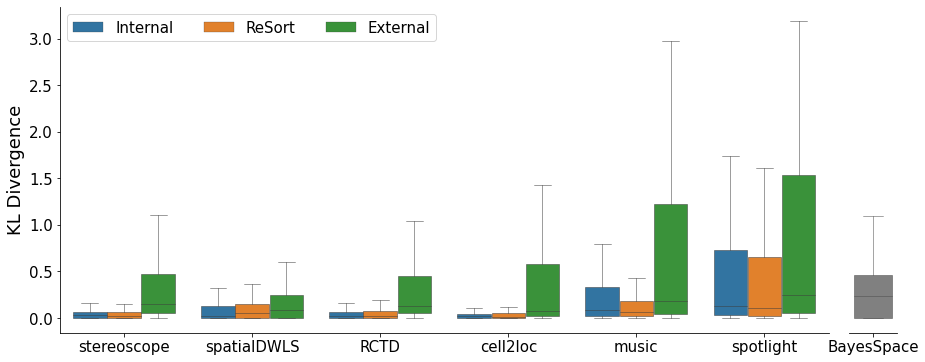

In [11]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 6), gridspec_kw={'width_ratios': [16, 1]}, sharey=True)
sns.boxplot(data=kl_dfs.loc[kl_dfs.method!='BayesSpace'], x='method', y='KL', hue='reference', 
            hue_order = ['Internal', 'ReSort', 'External'], order = methods[:-1], ax=ax1, linewidth=0.5, showfliers = False)
sns.boxplot(data=kl_dfs.loc[kl_dfs.method=='BayesSpace'], x='method', y='KL', ax=ax2, linewidth=0.5, color='gray', showfliers = False)
sns.despine();

# plt.xticks(range(6), ['Stereoscope', 'spatialDWLS', 'RCTD', 'cell2loc', 'MuSiC', 'SPOTlight', 'BayesSpace'],
#           fontsize=15);
ax1.set_xlabel("")
ax1.tick_params(axis='both', labelsize=15)
ax1.set_ylabel("KL Divergence", fontsize=18)
ax1.legend(fontsize=15, ncol = 3);

ax2.set_xlabel("")
ax2.tick_params(axis='both', labelsize=15)
ax2.set_ylabel("")
ax2.spines['left'].set_visible(False)
ax2.yaxis.set_ticks_position('none')
plt.subplots_adjust(wspace=0.05)
#plt.savefig('Fig1-Pure_KL_diver_boxplot.png', dpi=200, bbox_inches='tight')

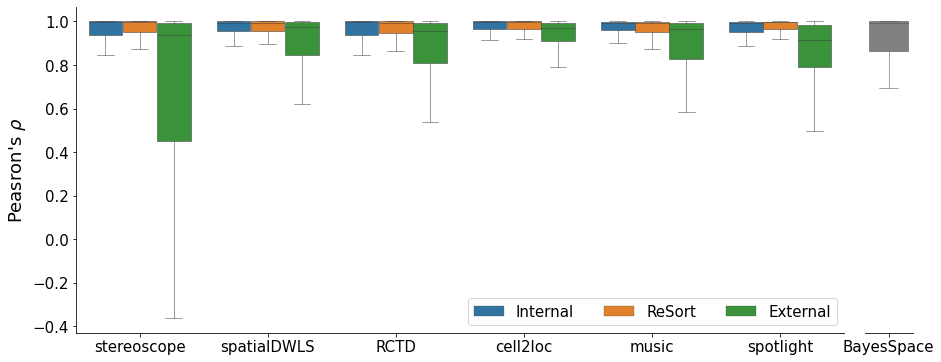

In [12]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 6), gridspec_kw={'width_ratios': [16, 1]}, sharey=True)

sns.boxplot(data=r_dfs.loc[r_dfs.method!='BayesSpace'], x='method', y='r', hue='reference', 
            hue_order = ['Internal', 'ReSort', 'External'], order = methods[:-1], ax=ax1, linewidth=0.5, showfliers = False);
sns.boxplot(data=r_dfs.loc[r_dfs.method=='BayesSpace'], x='method', y='r', ax=ax2, linewidth=0.5, color='gray', showfliers = False);
sns.despine();

# plt.xticks(range(6), ['Stereoscope', 'spatialDWLS', 'RCTD', 'cell2loc', 'MuSiC', 'SPOTlight'],
#           fontsize=15);

ax1.set_xlabel("")
ax1.tick_params(axis='both', labelsize=15)
ax1.set_ylabel(r"Peasron's $\rho$", fontsize=18)
ax1.legend(fontsize=15,  ncol = 3);

ax2.set_xlabel("")
ax2.tick_params(axis='both', labelsize=15)
ax2.set_ylabel("")
ax2.spines['left'].set_visible(False)
ax2.yaxis.set_ticks_position('none')
plt.subplots_adjust(wspace=0.05)

#plt.savefig('Fig1-Pure_Pearson_boxplot.png', dpi=200, bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


,Internal,ReSort,External
stereoscope,0.894613,0.904233,0.664150
spatialDWLS,0.908199,0.912033,0.835354
RCTD,0.893327,0.896718,0.792769
cell2loc,0.923483,0.923790,0.875551
music,0.914498,0.903039,0.821518
spotlight,0.902819,0.921962,0.799993


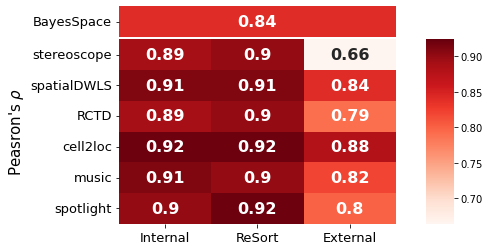

In [13]:
r_mean_df = pd.pivot_table(data=r_dfs, index='method', columns='reference', values='r', aggfunc='mean')
r_mean_df.index.name=None
r_mean_df.columns.name=None

vmin = np.nanmin(r_mean_df)
vmax = np.nanmax(r_mean_df)

f, axs = plt.subplots(2,2, gridspec_kw={'height_ratios': [1, 6], 'width_ratios': [10, 1]})

sns.heatmap(data=r_mean_df.loc[['BayesSpace'], ['BayesSpace']].round(2), annot=True,
            annot_kws={'weight':'bold', 'size':'16'}, 
            cmap='Reds', ax=axs[0,0], cbar=False, vmin=vmin, vmax=vmax)

axs[0,0].legend().remove()
axs[0,0].set_xticks([])
axs[0,0].set_xlabel('')
axs[0,0].tick_params(axis='y', labelsize=13, labelrotation=0)
axs[0,1].axis("off")

r_mean_df = r_mean_df.loc[methods[:-1], ['Internal','ReSort', 'External']]
sns.heatmap(data=r_mean_df.round(2), annot=True, annot_kws={'weight':'bold', 'size':'16'}, 
            cmap='Reds', ax=axs[1,0], cbar_ax = axs[1,1], vmin=vmin, vmax=vmax)

# ax.set_yticklabels(['Stereoscope', 'spatialDWLS', 'RCTD', 'cell2loc', 'MuSiC', 'SPOTlight']);
axs[1,0].set_xticklabels(['Internal', 'ReSort', 'External']);
axs[1,0].set_xlabel("")
axs[1,0].tick_params(axis='both', labelsize=13)
axs[1,0].set_ylabel(r"Peasron's $\rho$", fontsize=15)
plt.subplots_adjust(hspace=0.02)
#plt.savefig('Fig1-Pure_Mean_Pearson_r_heatmap.png', dpi=200, bbox_inches='tight')
r_mean_df

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


,Internal,ReSort,External
stereoscope,0.054277,0.043777,0.576578
spatialDWLS,0.074808,0.102458,0.285977
RCTD,0.048378,0.051167,0.346251
cell2loc,0.036897,0.035240,0.309616
music,0.195707,0.129666,0.714984
spotlight,0.418394,0.377113,0.829630


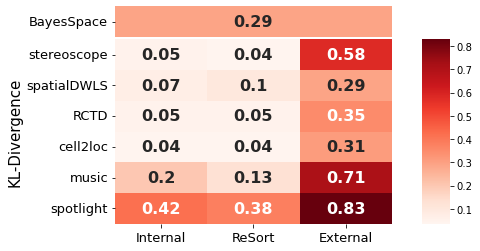

In [14]:
kl_mean_df = pd.pivot_table(data=kl_dfs, index='method', columns='reference', values='KL', aggfunc='mean')
kl_mean_df.index.name=None
kl_mean_df.columns.name=None

vmin = np.nanmin(kl_mean_df)
vmax = np.nanmax(kl_mean_df)

f, axs = plt.subplots(2,2, gridspec_kw={'height_ratios': [1, 6], 'width_ratios': [10, 1]})

sns.heatmap(data=kl_mean_df.loc[['BayesSpace'], ['BayesSpace']].round(2), annot=True,
            annot_kws={'weight':'bold', 'size':'16'}, 
            cmap='Reds', ax=axs[0,0], cbar=False, vmin=vmin, vmax=vmax)

axs[0,0].legend().remove()
axs[0,0].set_xticks([])
axs[0,0].set_xlabel('')
axs[0,0].tick_params(axis='y', labelsize=13, labelrotation=0)
axs[0,1].axis("off")

kl_mean_df = kl_mean_df.loc[methods[:-1], ['Internal','ReSort', 'External']]
sns.heatmap(data=kl_mean_df.round(2), annot=True, annot_kws={'weight':'bold', 'size':'16'}, 
            cmap='Reds', ax=axs[1,0], cbar_ax = axs[1,1], vmin=vmin, vmax=vmax)

# ax.set_yticklabels(['Stereoscope', 'spatialDWLS', 'RCTD', 'cell2loc', 'MuSiC', 'SPOTlight']);
axs[1,0].set_xticklabels(['Internal', 'ReSort', 'External']);
axs[1,0].set_xlabel("")
axs[1,0].tick_params(axis='both', labelsize=13)
axs[1,0].set_ylabel("KL-Divergence", fontsize=15)
plt.subplots_adjust(hspace=0.02)
#plt.savefig('Fig1-Pure_Mean_KL_heatmap.png', dpi=200, bbox_inches='tight')
kl_mean_df

RCTD


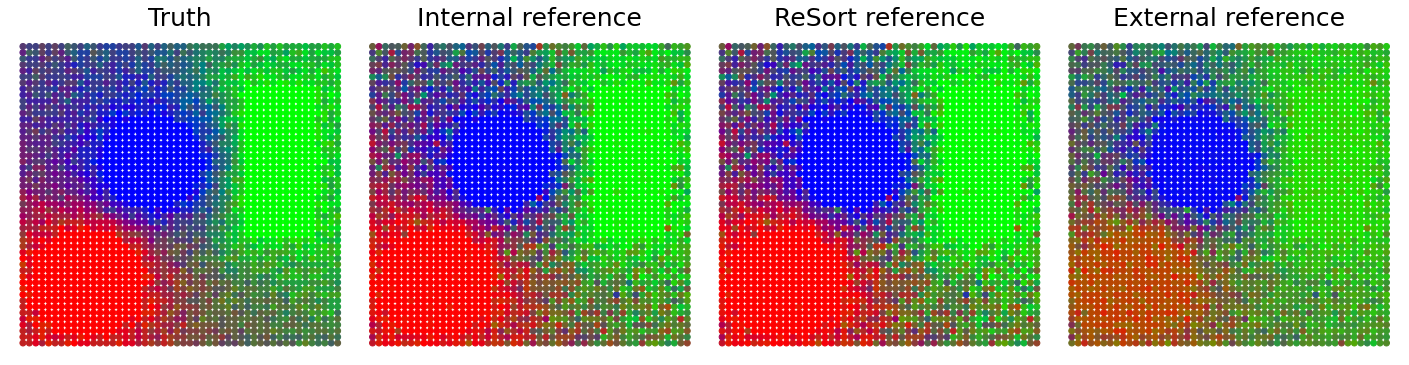

In [15]:
for method in ['RCTD']:
    fmt = 'csv'
    if method == 'stereoscope':
        fmt = 'tsv'
    folder = '../../models_results/primary/pure/'
    f = f"{folder}{method}_results"
    df_mist = read_process_res(f"{f}/estimated_proportions_ref_MIST.{fmt}", method, cell_types=cell_types)
    df_internal = read_process_res(f"{f}/estimated_proportions_ref_internal.{fmt}", method, cell_types=cell_types)
    df_external = read_process_res(f"{f}/estimated_proportions_ref_external.{fmt}", method, cell_types=cell_types)
    df_mist = df_mist.loc[truth.index,:]
    df_internal = df_internal.loc[truth.index,:]
    df_external = df_external.loc[truth.index,:]
    xs, ys = [], []

    for ind in truth.index.tolist():
        xs.append(int(ind.split('x')[0]))
        ys.append(int(ind.split('x')[1]))

    f = plt.figure(figsize=(25, 6))
    
    ax1 = plt.subplot(1, 4, 1)
    ax1.scatter(xs, ys, c=truth.values)
    ax1.set_title('Truth', fontsize=25)
    ax1.axis("off")

    ax2 = plt.subplot(1, 4, 2)
    ax2.scatter(xs, ys, c=df_internal.values)
    ax2.set_title('Internal reference', fontsize=25)
    ax2.axis("off")

    ax3 = plt.subplot(1, 4, 3)
    ax3.scatter(xs, ys, c=df_mist.values)
    ax3.set_title('ReSort reference', fontsize=25)
    ax3.axis("off")

    ax4 = plt.subplot(1, 4, 4)
    ax4.set_title('External reference', fontsize=25)
    ax4.scatter(xs, ys, c=df_external.values)
    ax4.axis("off")

    plt.subplots_adjust(wspace=0.01)
#     plt.savefig(f"Pure_spatial_celll_pattern_compare_{method}.png", dpi=300, bbox_inches='tight')
    print(method)

(-2.45, 51.45, -2.45, 51.45)

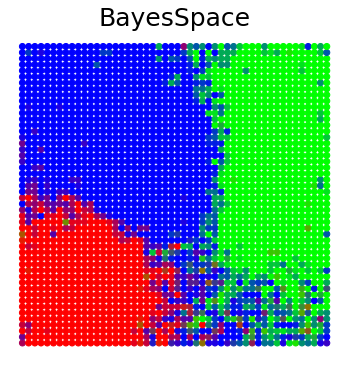

In [16]:
## BayesSpace Results
df_bs_pure = read_process_res('../../models_results/primary/pure/BayesSpace_results/estimated_proportions_BayesSpace.csv',
                              method, cell_types)
xs, ys = [], []
for ind in df_bs_pure.index.tolist():
    xs.append(int(ind.split('x')[0]))
    ys.append(int(ind.split('x')[1]))
        
f = plt.figure(figsize=(6, 6))   
ax1 = plt.subplot(1, 1, 1)
ax1.scatter(xs, ys, c=df_bs_pure.values)
ax1.set_title('BayesSpace', fontsize=25)
ax1.axis("off")
#plt.savefig(f"Pure_spatial_celll_pattern_BayesSpace.png", dpi=100, bbox_inches='tight')